# Feature scaling and learning rate alpha

In this notebook are implemented:
- Gradient Descent on a data set with multiple features
- the impact of the *learning rate alpha* on gradient descent
- performance of gradient descent by *feature scaling* using z-score normalization

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
np.set_printoptions(precision=2)


In [7]:
#the dataset is the same as the one we used in the fifth lab
# Features: [Size (m²), Bedrooms, Floors, Age of Home (yrs)]
X_train = np.array([
    [120, 3, 1, 20],
    [85, 2, 2, 10],
    [200, 4, 1, 5],
    [150, 3, 2, 30],
    [95, 2, 1, 15]
])

# Target: Price in thousands of euros
y_train = np.array([350, 220, 540, 300, 240])
X_features = ["Size (m²)", "Bedrooms", "Floors", "Age"]


First we try to plot each feature vs the price and see how it looks

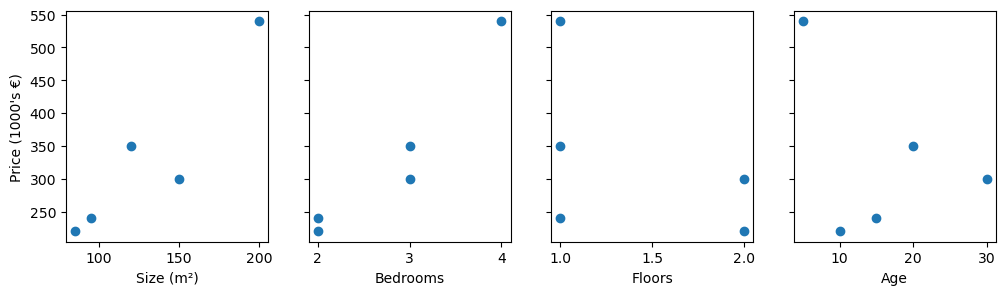

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's €)")
plt.show()

The learning rate controls the size of the update to the parameters. See equation (1) above. It is shared by all the parameters.  

Let's run gradient descent and try a few settings of $\alpha$ on our data set

In [13]:
def compute_cost(X, y, w, b):
    """
    X is the dataset containing m samples of n features with shape (m, n)
    w is the set of weights and has shape (n,)
    b is the bias parameters
    y are the target values with shape (m,)
    The function returns a (scalar) cost
    """

    m = X.shape[0] #initializing m as the number of rows in our dataset (each row represents a set of data)
    cost = 0.0
    for i in range(m): #so that we can iterate over the number of samples passed to it
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    total_cost = cost/(2*m)
    return total_cost

def compute_gradient(X, y, w, b):
    """
    X array with m examples and n features (our matrix m rows by n columns)
    y array of target values m (one for each sample in our dataset)
    w array of weights for each feature so has size n
    b bias term
    The function returns:
    dj_dw which has the same dimensions of w (n, )
    dj_db which is a scalar 
    """
    m, n = X.shape 
    #this time we dont have to specify X[0] to state that we are referring to a single column
    #in this way we are able to specify that m has to cover the first dimension of our data set: m the number of samples
    #and n will cover the second dimension of our dataset X which belongs to the number of features
    dj_dw = np.zeros((n, ))
    dj_db = 0.
    for i in range(m):
        deviation = (np.dot(X[i], w) + b) - y[i] #loop over each sample
        for j in range(n): #loop over each feature
            dj_dw[j] = dj_dw[j] + deviation*X[i, j]
        dj_db = dj_db + deviation
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw, dj_db

def run_gradient_descent(X, y, num_iters, alpha):
    w = np.zeros(X.shape[1])
    b = 0
    J_hist = []
    w_hist = []
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = compute_cost(X, y, w, b)
        J_hist.append(cost)
        w_hist.append(w[0])  # just track w[0] for plotting
        
        if i % max(1, num_iters // 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost:8.2f}")
    
    return w, b, J_hist, w_hist

def plot_cost_i_w(J_hist, w_hist, alpha):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Cost vs iteration
    ax1.plot(range(len(J_hist)), J_hist, color='blue')
    ax1.set_title(f"Cost vs Iteration (alpha={alpha})")
    ax1.set_xlabel("Iteration")
    ax1.set_ylabel("Cost J(w, b)")
    
    # Cost vs w[0]
    ax2.plot(w_hist, J_hist, color='orange')
    ax2.set_title("Cost vs w[0]")
    ax2.set_xlabel("w[0]")
    ax2.set_ylabel("Cost J(w, b)")
    
    plt.show()


Iteration    0: Cost 60783.95
Iteration    5: Cost 59666.43
Iteration   10: Cost 58569.81
Iteration   15: Cost 57493.71
Iteration   20: Cost 56437.73
Iteration   25: Cost 55401.50
Iteration   30: Cost 54384.65
Iteration   35: Cost 53386.83
Iteration   40: Cost 52407.66
Iteration   45: Cost 51446.82


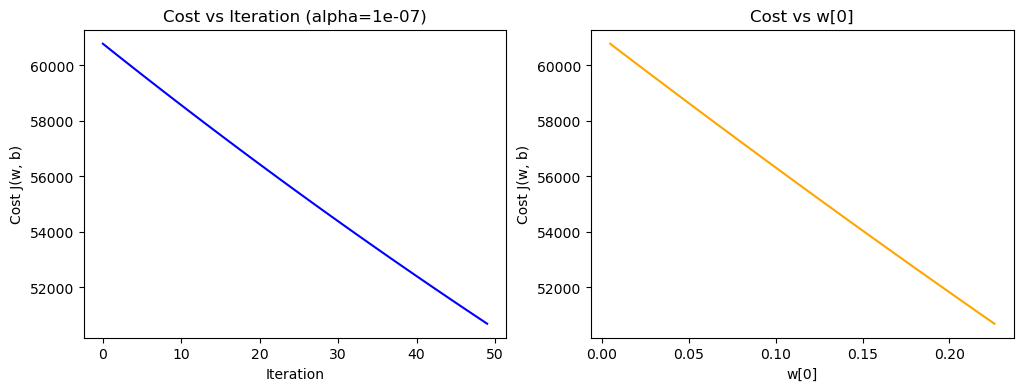

Iteration    0: Cost 58768.73
Iteration    5: Cost 48757.91
Iteration   10: Cost 40482.99
Iteration   15: Cost 33642.96
Iteration   20: Cost 27988.99
Iteration   25: Cost 23315.40
Iteration   30: Cost 19452.18
Iteration   35: Cost 16258.81
Iteration   40: Cost 13619.13
Iteration   45: Cost 11437.13


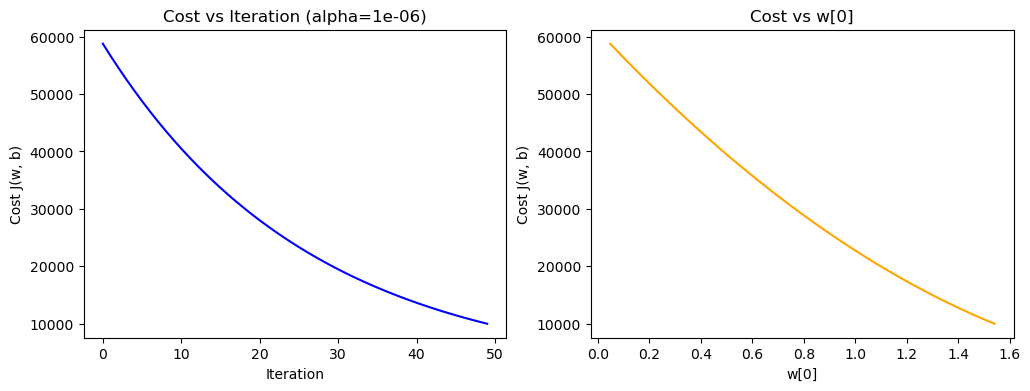

Iteration    0: Cost 40517.98
Iteration    5: Cost  5917.41
Iteration   10: Cost  1636.14
Iteration   15: Cost  1103.15
Iteration   20: Cost  1033.59
Iteration   25: Cost  1021.36
Iteration   30: Cost  1016.26
Iteration   35: Cost  1012.07
Iteration   40: Cost  1008.04
Iteration   45: Cost  1004.06


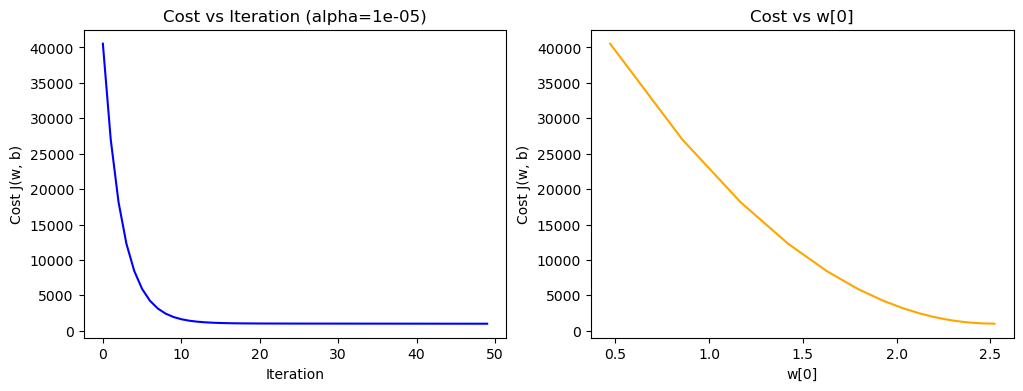

In [14]:
alphas = [1e-7, 1e-6, 1e-5]
for alpha in alphas:
    w, b, J_hist, w_hist = run_gradient_descent(X_train, y_train, 50, alpha)
    plot_cost_i_w(J_hist, w_hist, alpha)


### z-score normalization 
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

>**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bed-
rooms), we must first normalize x using the mean and standard deviation
that we had previously computed from the training set.

**Implementation**

In [15]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 
#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

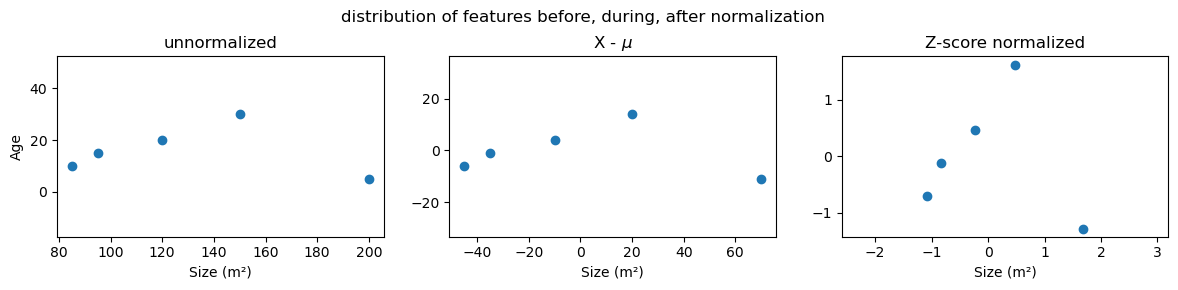

In [16]:
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma      

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()